Shape of dataset: (100000, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State 

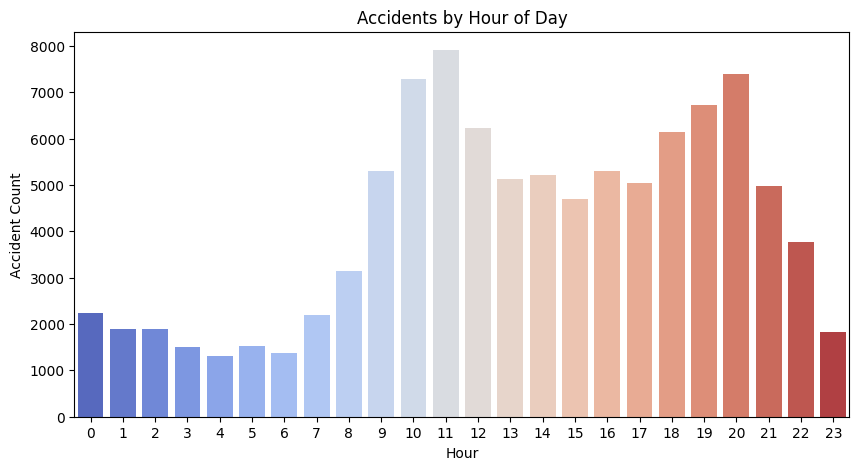

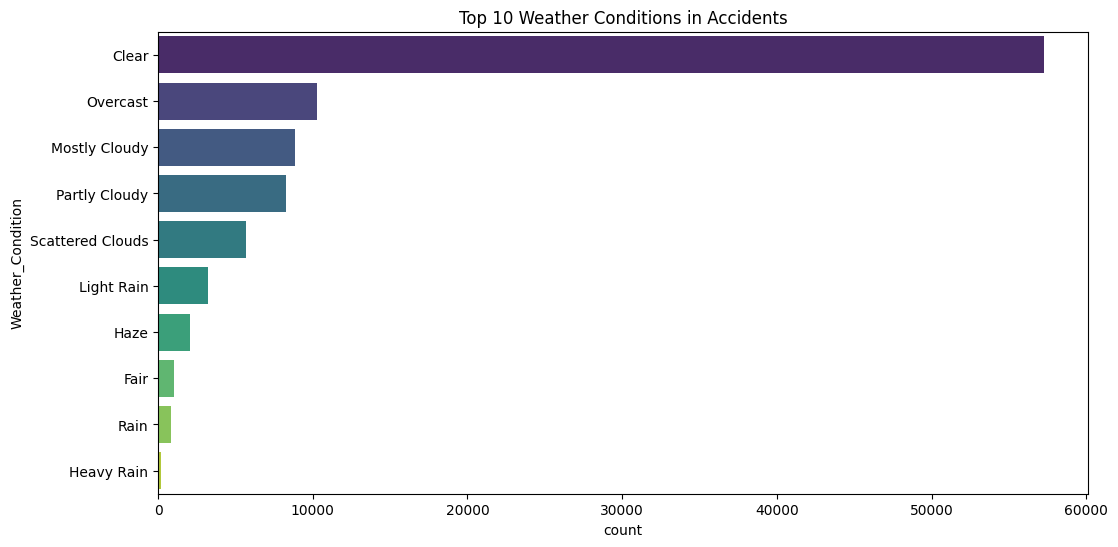

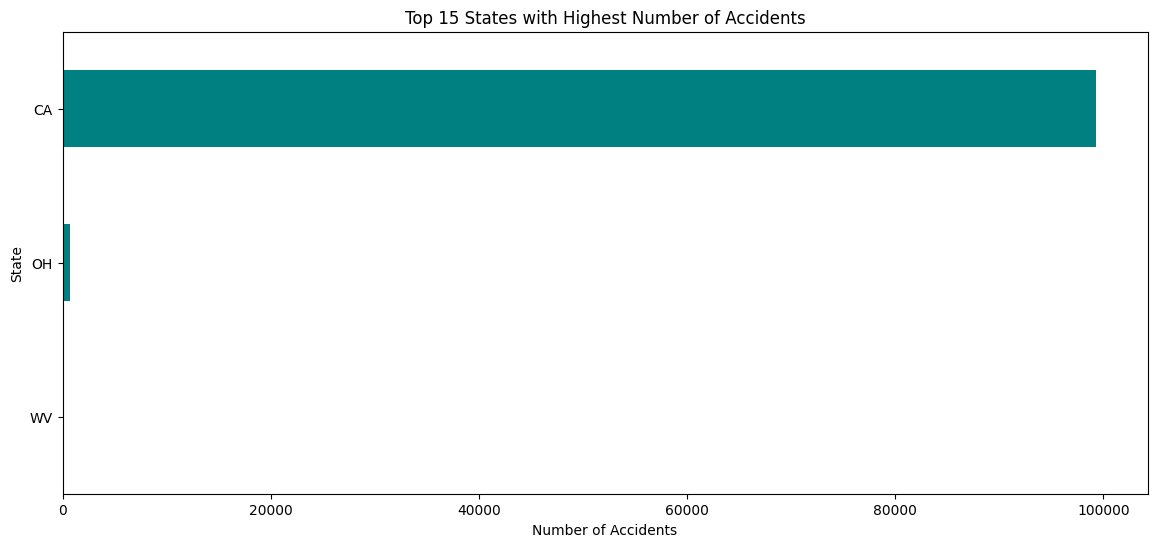

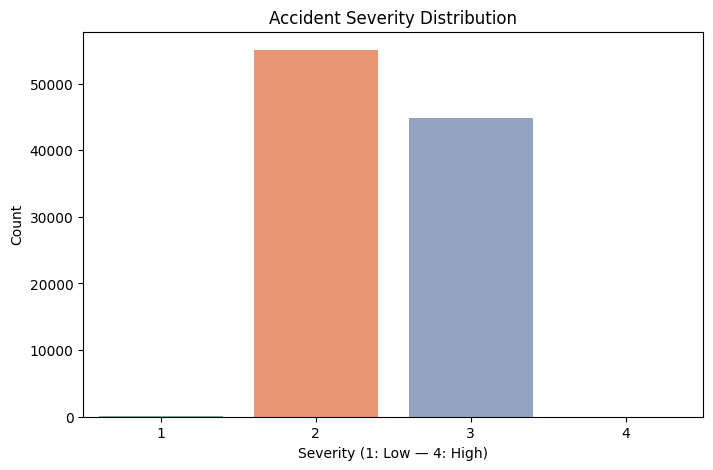

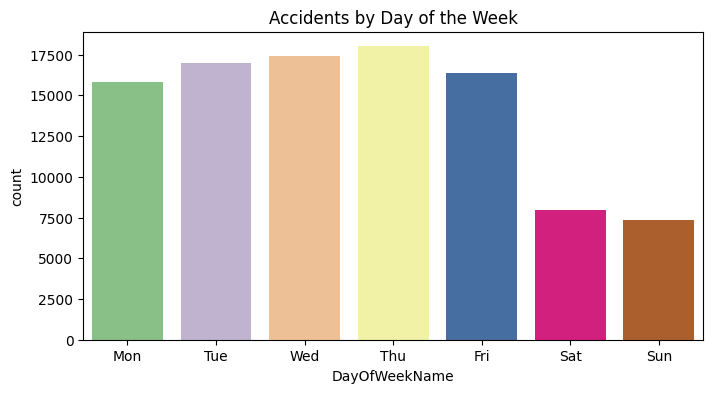

In [3]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive Visuals
import folium
from folium.plugins import HeatMap

# System & Plot Settings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
     

# Step 3: Load the Data
df = pd.read_csv('US_Accidents_March23.csv', nrows=100000)
print("Shape of dataset:", df.shape)
df.head()
df.info()
df.describe()
df.isna().sum().sort_values(ascending=False).head(20)
df.dropna(subset=["Start_Lat", "Start_Lng"], inplace=True)

# Convert time
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
     

# Step 6: Accidents by Time of Day
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.show()
# Step 7: Accidents by Weather Condition
plt.figure(figsize=(12,6))
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts()[:10].index, palette='viridis')
plt.title('Top 10 Weather Conditions in Accidents')
plt.show()
plt.figure(figsize=(14,6))
df['State'].value_counts()[:15].plot(kind='barh', color='teal')
plt.title('Top 15 States with Highest Number of Accidents')
plt.xlabel('Number of Accidents')
plt.gca().invert_yaxis()
plt.show()
plt.figure(figsize=(8,5))
sns.countplot(x='Severity', data=df, palette='Set2')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity (1: Low — 4: High)')
plt.ylabel('Count')
plt.show()
    
sample_df = df[['Start_Lat', 'Start_Lng']].sample(n=10000)

map_us = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # USA center
HeatMap(data=sample_df.values.tolist(), radius=10).add_to(map_us)
map_us
dow = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
df['DayOfWeekName'] = df['DayOfWeek'].apply(lambda x: dow[x])

plt.figure(figsize=(8,4))
sns.countplot(x='DayOfWeekName', data=df, order=dow, palette='Accent')
plt.title('Accidents by Day of the Week')
plt.show()
     